#**Classification: Iris Dataset**
**-by Avi Patni, Jashn Tyagi and Mohit Pansare**

We tried different classification algorithms:
1. K-Nearest Neighbours  
2. Logistic Regression
3. Gaussian Naive Bayes 
4. Decision Tree
5. Random Forest Classifier
6. Linear SVC

### *Step 1*: Importing necessary libraries

In [4]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-5lj9wt1w
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-5lj9wt1w
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.8.3-py2.py3-none-any.whl (17 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.dev0-py2.py3-none-any.whl size=100309 sha256=13304a349f867fba0519bdfa8f14d52265f2814e8a761e1ea8e44fa98cc1ab8a
  Stored in directory: /tmp/pip-ephem-wheel-cache-n9ng4gvp/wheels/d6/9e/e3/8818f5597f06caa60393811f8aa57eb87b8565d772046d1b72
Successfully built scikit-optimize


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from skopt import BayesSearchCV

### *Step 2*: Loading the dataset

In [6]:
url = "https://raw.githubusercontent.com/XaviPat01/ML_TechAnalogy_Workshop/main/Major%20Project%201/iris.csv"
dataset = pd.read_csv(url)

dataset.head(5)


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [7]:
dataset.drop("Unnamed: 0",axis=1, inplace = True)
dataset.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
dataset.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
dataset.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
dataset_X = dataset[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
dataset_Y = dataset.Species

### *Step 3*: Exploratory Data Analysis
We use matplotlib and seaborn for data visualization




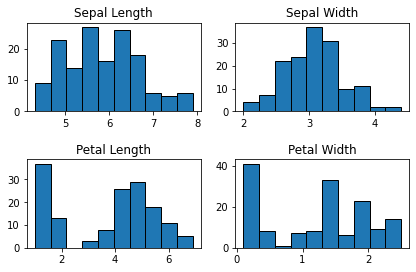

In [11]:
fig,axs = plt.subplots(2,2)
axs[0,0].hist(dataset['Sepal.Length'], edgecolor = 'black', linewidth = 1)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(dataset['Sepal.Width'], edgecolor = 'black', linewidth = 1)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(dataset['Petal.Length'], edgecolor = 'black', linewidth = 1)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(dataset['Petal.Width'], edgecolor = 'black', linewidth = 1)
axs[1,1].set_title('Petal Width')

fig.tight_layout(pad = 1.5)

*Inference*: Some clear differences in petal length and petal width. There might be different groups in this data

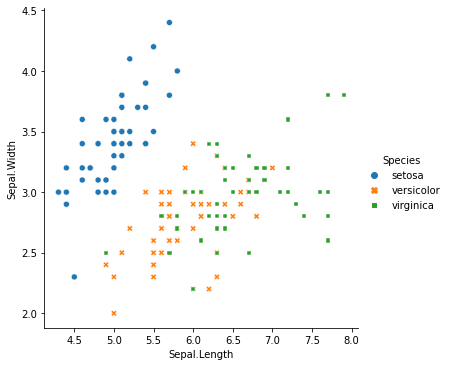

In [12]:
sprel = sns.relplot(x="Sepal.Length",y ="Sepal.Width",data = dataset,hue="Species",style="Species")
plt.show()

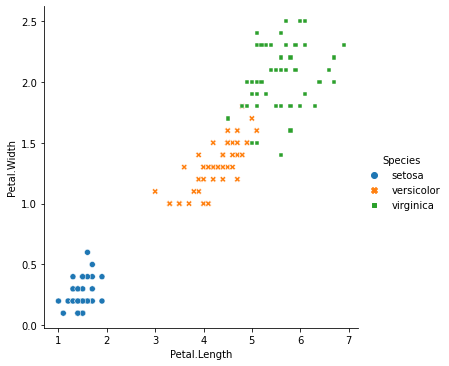

In [13]:
ptrel=sns.relplot(x="Petal.Length",y="Petal.Width",data=dataset,hue="Species",style='Species')
plt.show()

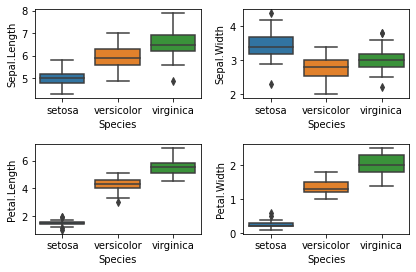

In [14]:
fig,axs = plt.subplots(2,2)
ftrnames = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
cn = ['setosa','versicolor','virginica']

sns.boxplot(x = 'Species', y = 'Sepal.Length', data = dataset, order = cn, ax = axs[0,0])
sns.boxplot(x = 'Species', y = 'Sepal.Width', data = dataset, order = cn, ax = axs[0,1])
sns.boxplot(x = 'Species', y = 'Petal.Length', data = dataset, order = cn, ax = axs[1,0])
sns.boxplot(x = 'Species', y = 'Petal.Width', data = dataset, order = cn, ax = axs[1,1])

fig.tight_layout(pad=1.5)

***Inference***: Petal Length, and Petal width are good indicators of groups. Also, from the bottom two plots we can see that Setosa are the ones, that were present in the smaller values in the histograms.

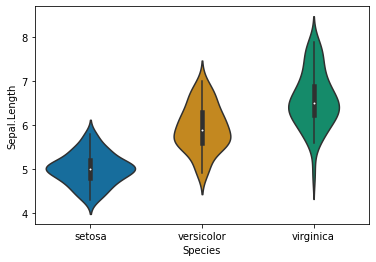

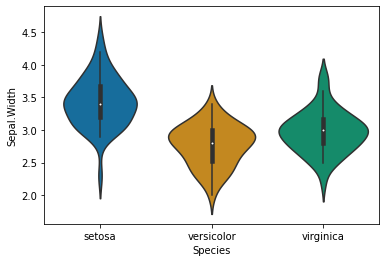

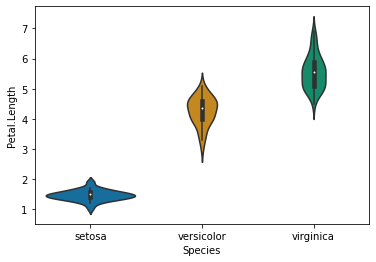

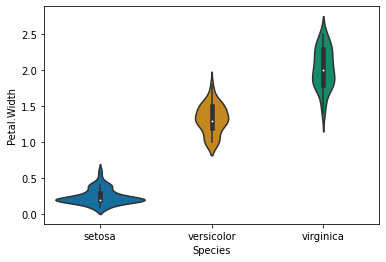

In [15]:
sns.violinplot(x="Species",y="Sepal.Length", data = dataset, order=cn, palette='colorblind')
plt.show()

sns.violinplot(x="Species",y="Sepal.Width", data = dataset, order=cn, palette='colorblind')
plt.show()

sns.violinplot(x="Species",y="Petal.Length", data = dataset, order=cn, palette='colorblind')
plt.show()

sns.violinplot(x="Species",y="Petal.Width", data = dataset, order=cn, palette='colorblind')
plt.show()

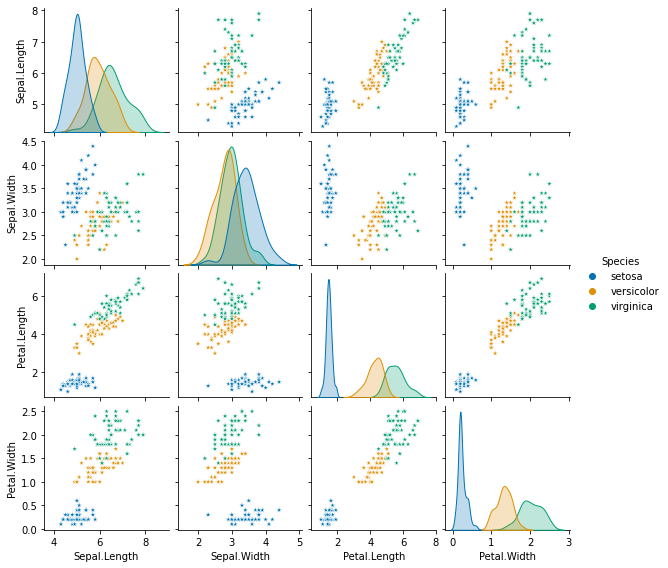

In [16]:
sns.pairplot(dataset, hue = "Species", height =2,markers="*", palette="colorblind")
plt.show()

This reiterates that the petal measurements separate the different species better than the sepal ones.

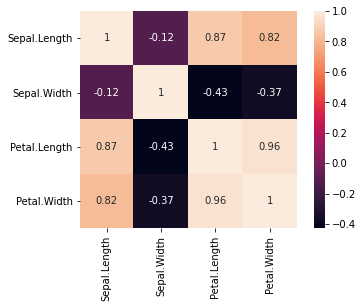

In [17]:
corrmat = dataset.corr()
sns.heatmap(corrmat,square = True, annot= True)

*Inference* : Petal measurements have highly positive correlation. They also have high correlation with Sepal Length, but not with Sepal Width.
Sepal measurements aren't correlated

### *Step 4*: **Splitting dataset into train & test set**
We should have a validation set as well, but due to the small size we can simplify it by using the test set to serve the purpose of validation set. 

NOTE: We have used KFold cross-validation after this initial run.


In [18]:
train, test = train_test_split(dataset,test_size=0.4,stratify = dataset['Species'], random_state=21)

In [19]:
#train.head(5)
print(train.shape)

(90, 5)


In [20]:
#test.head(5)
print(test.shape)

(60, 5)


In [21]:
train_X = train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
train_Y = train.Species

test_X = test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
test_Y = test.Species

train_X_trim = train[['Sepal.Length','Petal.Length','Petal.Width']]
test_X_trim = test[['Sepal.Length','Petal.Length','Petal.Width']]

In [37]:
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

### *Step 5*: **Training different models**

#### *Model 1*: Decision Tree


In [22]:
mod_dt = DecisionTreeClassifier(max_depth = 3)
mod_dt.fit(train_X,train_Y)
prediction = mod_dt.predict(test_X)
print('The accuracy of the Decision Tree is',"{:.5f}".format(metrics.accuracy_score(prediction,test_Y)))

The accuracy of the Decision Tree is 0.96667


In [23]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.93809524, 0.06190476])

[Text(209.25, 380.52, 'Petal Length <= 2.45\ngini = 0.667\nsamples = 90\nvalue = [30, 30, 30]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'Petal Length <= 4.85\ngini = 0.5\nsamples = 60\nvalue = [0, 30, 30]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'Petal Width <= 1.65\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'Petal Width <= 1.75\ngini = 0.124\nsamples = 30\nvalue = [0, 2, 28]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]\nclass = virginica')]

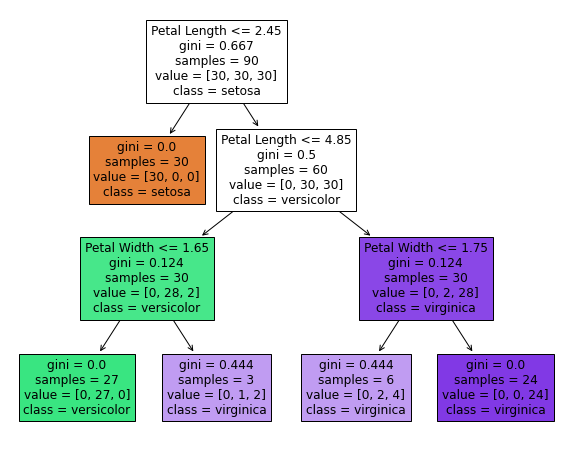

In [24]:
plt.figure(figsize=(10,8))
plot_tree(mod_dt,feature_names=ftrnames,class_names=cn,filled=True)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix, without normalization')

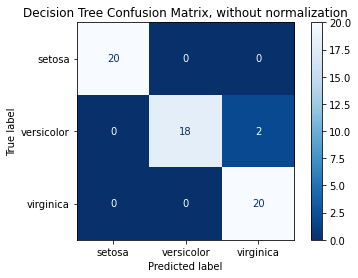

In [25]:
disp = metrics.plot_confusion_matrix(mod_dt, test_X, test_Y, display_labels=cn, cmap = plt.cm.Blues_r,normalize=None)
disp.ax_.set_title('Decision Tree Confusion Matrix, without normalization')

#### *Model 2*: Random Forest Classifier


In [26]:
clf = RandomForestClassifier(n_estimators=500,max_depth=3,)
clf.fit(train_X,train_Y)

predictions_clf = clf.predict(test_X)
print('The accuracy of the Random Forest Classifier is',"{:.5f}".format(metrics.accuracy_score(predictions_clf,test_Y)))

The accuracy of the Random Forest Classifier is 0.98333


In [27]:
feature_imp = pd.Series(clf.feature_importances_,index=ftrnames).sort_values(ascending=False)
feature_imp

Petal Length    0.481460
Petal Width     0.406421
Sepal Length    0.093414
Sepal Width     0.018706
dtype: float64

Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix')

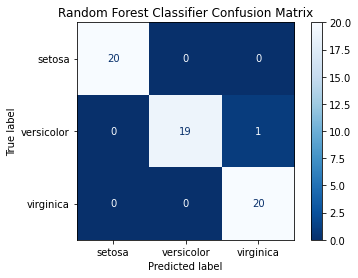

In [28]:
disp = metrics.plot_confusion_matrix(clf, test_X, test_Y, display_labels=cn, cmap = plt.cm.Blues_r)
disp.ax_.set_title('Random Forest Classifier Confusion Matrix')

Hyperparameter Tuning using BayesSearchCV

In [32]:
params=dict()
params['n_estimators']=(1,1000,'log-uniform')
params['max_depth']=(1,10,'log-uniform')

search = BayesSearchCV(estimator=RandomForestClassifier(),search_spaces=params,scoring='accuracy',cv=skf)
search.fit(dataset_X,dataset_Y)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
              error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=...
                                               n_estimators=100, n_jobs=None,
                                               oob_score=False,
                                      

In [33]:
print(search.best_score_)
print(search.best_params_)

0.9600000000000002
OrderedDict([('max_depth', 5), ('n_estimators', 144)])


###*Model 3*: Gaussian Naive Bayes

In [ ]:
gaussian = GaussianNB()
gaussian.fit(train_X, train_Y)
prediction_gnb = gaussian.predict(test_X)
print('The accuracy of the Gaussian Naive Bayes Classifier is',"{:.5f}".format(metrics.accuracy_score(prediction_gnb,test_Y)))
# f1 = metrics.f1_score(test_Y,prediction_gnb,average='micro')
# print(f1)

In [ ]:
disp = metrics.plot_confusion_matrix(gaussian, test_X, test_Y, display_labels=cn, cmap = plt.cm.Blues_r)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

In [ ]:
gaussian = GaussianNB()
gaussian.fit(train_X_trim, train_Y)
prediction_gnb = gaussian.predict(test_X_trim)
print('The accuracy of the Gaussian Naive Bayes Classifier on selected features is',"{:.5f}".format(metrics.accuracy_score(prediction_gnb,test_Y)))

### *Model 4*: Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(train_X,train_Y)
prediction_logreg = logreg.predict(test_X)
print('The accuracy of the Gaussian Naive Bayes Classifier is',"{:.5f}".format(metrics.accuracy_score(prediction_logreg,test_Y)))

In [ ]:
disp = metrics.plot_confusion_matrix(logreg, test_X,test_Y,display_labels=cn,cmap = plt.cm.Blues_r)
disp.ax_.set_title("Logistic Regression (One v/s all) Confusion Matrix")

Hyperparameter Tuning using BayesSearchCV

In [40]:
params={'solver':('newton-cg','lbfgs','liblinear','sag','saga')}

search = BayesSearchCV(estimator = LogisticRegression(max_iter=10000),search_spaces=params,scoring='accuracy',cv=skf)
search.fit(dataset_X,dataset_Y)


/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

BayesSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
              error_score='raise',
              estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                           fit_intercept=True,
                                           intercept_scaling=1, l1_ratio=None,
                                           max_iter=10000, multi_class='auto',
                                           n_jobs=None, penalty='l2',
                                           random_state=None, solver='lbfgs',
                                           tol=0.0001, verbose=0,
                                           warm_start=False),
              fit_params=None, iid='deprecated', n_iter=50, n_jobs=1,
              n_points=1, optimizer_kwargs=None, pre_dispatch='2*n_jobs',
              random_state=None, refit=True, return_train_score=False,
              scoring='accuracy',
              search_spaces={'solver': ('newton-cg', 'lbfgs',

In [41]:
print(search.best_score_)
print(search.best_params_)

0.9600000000000002
OrderedDict([('solver', 'saga')])


### *Model 5*: K Nearest Neighbours

In [ ]:
k_range = list(range(1,20))
scores=[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(train_X,train_Y)
  pred_Y = knn.predict(test_X)
  scores.append(metrics.accuracy_score(test_Y,pred_Y))

plt.plot(k_range,scores)
plt.ylabel('Accuracy Score')
plt.xlabel('Value of k for KNN')
plt.title('Accuracy Scores for Values of k')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X,train_Y)
prediction_knn = knn.predict(test_X)
print('The accuracy of the K Nearest Neighbours algorithm is',"{:.5f}".format(metrics.accuracy_score(prediction_knn,test_Y)))
# f1 = metrics.f1_score(test_Y,prediction_knn,average='micro')
# print(f1)

In [ ]:
disp = metrics.plot_confusion_matrix(knn, test_X, test_Y, display_labels=cn, cmap = plt.cm.Blues_r)
disp.ax_.set_title('K Nearest Neighbours Confusion Matrix')

Hyperparameter Tuning using BayesSearchCV


In [ ]:
params=dict()
params['n_neighbors']=(1,81,'log-uniform')

search = BayesSearchCV(estimator = KNeighborsClassifier(),search_spaces=params,scoring='accuracy',cv=skf)
search.fit(dataset_X,dataset_Y)

In [ ]:
print(search.best_score_)
print(search.best_params_)

### *Model 6* : Linear SVC

In [ ]:
linear_svc = SVC(kernel='linear',max_iter=10000)
linear_svc.fit(train_X,train_Y)
prediction_svc = linear_svc.predict(test_X)
print('The accuracy of the Linear SVC is',"{:.5f}".format(metrics.accuracy_score(prediction_svc,test_Y)))
# f1 = metrics.f1_score(test_Y,prediction_svc,average='micro')
# print(f1)

In [ ]:
disp = metrics.plot_confusion_matrix(knn,test_X,test_Y,display_labels=cn, cmap = plt.cm.Blues_r)
disp.ax_.set_title("Linear SVC Confusion Matrix")

Hyperparameter Tuning using BayesSearchCV

In [ ]:
params=dict()
params['C']=(1,100,'log-uniform')
params['kernel']=('linear','poly','rbf','sigmoid')

search = BayesSearchCV(estimator = SVC(),search_spaces=params,scoring='accuracy',cv=skf)
search.fit(dataset_X,dataset_Y)


In [ ]:
print(search.best_score_)
print(search.best_params_)

###*Step 7*: Further Selection

We thought of using Cross Validation Score as another metric to further choose which model is optimum.

We implemented Stratified K-Fold Sampling to generalize it further.

In [42]:
models=[]
models.append(('Decision Tree',DecisionTreeClassifier(max_depth=3)))
models.append(('Random Forest Classifier',RandomForestClassifier(n_estimators=144, max_depth=5)))
models.append(('Gaussian Naive Bayes',GaussianNB()))
models.append(('Logistic Regression',LogisticRegression(solver='saga',max_iter=5000)))
models.append(('K-Nearest Neighbours',KNeighborsClassifier(n_neighbors=15)))
models.append(('Linear SVC',SVC(kernel='rbf',max_iter=10000,C=3)))

In [43]:
results=[]
for name,model in models:
  skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=1)
  score = cross_val_score(model,dataset_X,dataset_Y,scoring='accuracy',cv=skf,n_jobs=1)
  results.append((name,score))


In [44]:
for name,result in results:
  print(f"{name}: {result.mean()}")

Decision Tree: 0.9466666666666667
Random Forest Classifier: 0.9600000000000002
Gaussian Naive Bayes: 0.9600000000000002
Logistic Regression: 0.9600000000000002
K-Nearest Neighbours: 0.9800000000000001
Linear SVC: 0.9866666666666667
